<a href="https://colab.research.google.com/github/reitezuz/notebooks-for-NES2-2024/blob/main/mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MLP model - simple example

In [ ]:
import keras
from keras.datasets import mnist
import numpy as np
from sklearn.model_selection import train_test_split

###############################################
# Load  and pre-proces the data
(train_images, y_train), (test_images, y_test) = mnist.load_data()

x_train = train_images.reshape(60000, 28 * 28)
x_test = test_images.reshape(10000, 28 * 28)
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train)

###############################################
# Define the model
# Define architecture:
model = keras.Sequential([
    keras.layers.InputLayer(shape=(28 * 28,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])
# Summarize the model
model.summary()

# Set model parameters
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

###############################################
# Train the model
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_val, y_val))
###############################################
# Evaluate the model on the training set
train_loss, train_acc = model.evaluate(x_train, y_train)
print('Training accuracy:', train_acc, '\nTrain loss:', train_loss)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc, '\nTest loss:', test_loss)

###############################################
# Use the model to make predictions
y_pred_probs = model.predict(x_test)  # get probabilities
y_pred = np.argmax(y_pred_probs, axis=1) # get predicted labels
print("Predicted labels:", y_pred[:10], "\nTrue labels:", y_test[:10])

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8863 - loss: 0.4039 - val_accuracy: 0.9618 - val_loss: 0.1282
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9661 - loss: 0.1131 - val_accuracy: 0.9700 - val_loss: 0.0945
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9777 - loss: 0.0741 - val_accuracy: 0.9713 - val_loss: 0.0904
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9823 - loss: 0.0573 - val_accuracy: 0.9787 - val_loss: 0.0728
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9852 - loss: 0.0438 - val_accuracy: 0.9756 - val_loss: 0.0837
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9882 - loss: 0.0357 - val_accuracy: 0.9771 - val_loss: 0.0828
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9903 - loss: 0.0281 - val_accuracy: 0.9757 - val_loss: 0.0844
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9913 - loss: 0.026

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


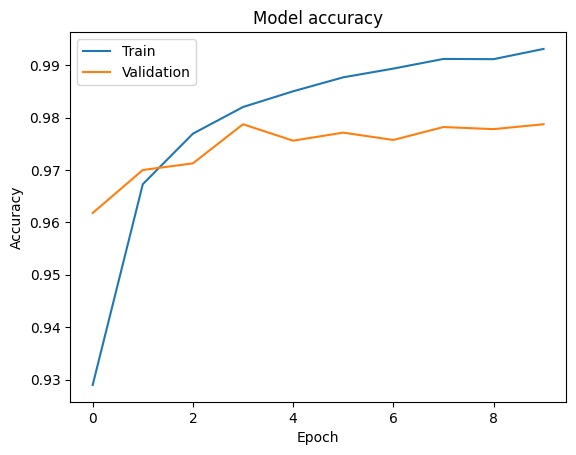

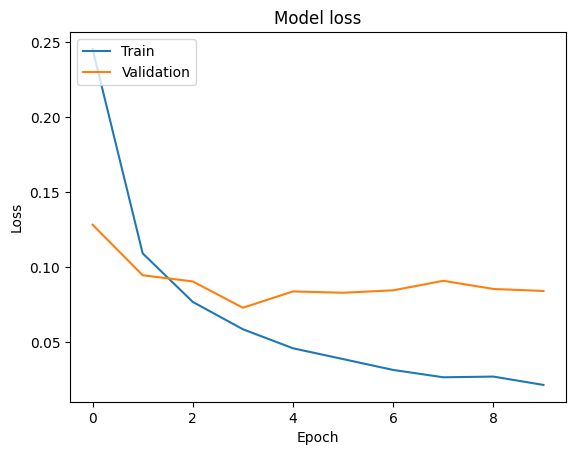

In [ ]:
# plot the training progress:
import matplotlib.pyplot as plt

history_dict = history.history
print(history_dict.keys())

# Plot training & validation accuracy values
plt.plot(history_dict['accuracy'])
plt.plot(history_dict['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_dict['loss'])
plt.plot(history_dict['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Number of misclassified images: 191 out of 10000 , accuracy 0.98089998960495


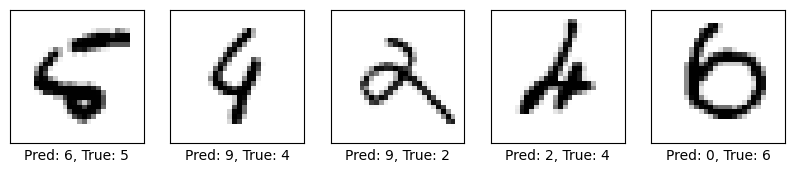

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Misclassified indices:
misclassified_indices = np.where(y_pred != y_test)[0]
num_misclassified = len(misclassified_indices)
print("Number of misclassified images:", num_misclassified,
      "out of", len(y_test), ", accuracy", test_acc)

# Plot some misclassified images
num_images_to_plot = 5
plt.figure(figsize=(10, 10))
for i in range(min(num_images_to_plot, len(misclassified_indices))):
    index = misclassified_indices[i]
    plt.subplot(1, num_images_to_plot, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[index], cmap=plt.cm.binary)
    plt.xlabel(f"Pred: {y_pred[index]}, True: {y_test[index]}")
plt.show()

# CNN model

In [ ]:
import keras
from keras.datasets import mnist
import numpy as np
from sklearn.model_selection import train_test_split

###############################################
# Load  and pre-proces the data
(train_images, y_train), (test_images, y_test) = mnist.load_data()
x_train = train_images.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = test_images.reshape(-1, 28, 28, 1).astype('float32') / 255
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train)

###############################################
# Define the model architecture
model = keras.Sequential([
    keras.Input(shape=(28, 28, 1)),
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])
 # Summarize the model
model.summary()

# Set model parameters
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

###############################################
# Train the model
history = model.fit(x_train, y_train, epochs=8, batch_size=64,
                    validation_data=(x_val, y_val))
###############################################
# Evaluate the model on the training set
train_loss, train_acc = model.evaluate(x_train, y_train)
print('Training accuracy:', train_acc, '\nTrain loss:', train_loss)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc, '\nTest loss:', test_loss)

###############################################
# Use the model to make predictions
y_pred_probs = model.predict(x_test)  # get probabilities
y_pred = np.argmax(y_pred_probs, axis=1) # get predicted labels
print("Predicted labels:", y_pred[:10], "\nTrue labels:", y_test[:10])


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/8
704/704 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 0.8209 - loss: 0.5727 - val_accuracy: 0.9773 - val_loss: 0.0732
Epoch 2/8
704/704 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - accuracy: 0.9698 - loss: 0.1034 - val_accuracy: 0.9850 - val_loss: 0.0504
Epoch 3/8
704/704 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0.9792 - loss: 0.0701 - val_accuracy: 0.9859 - val_loss: 0.0481
Epoch 4/8
704/704 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9825 - loss: 0.0570 - val_accuracy: 0.9873 - val_loss: 0.0440
Epoch 5/8
704/704 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - accuracy: 0.9855 - loss: 0.0471 - val_accuracy: 0.9874 - val_loss: 0.0407
Epoch 6/8
704/704 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - accuracy: 0.9864 - loss: 0.0410 - val_accuracy: 0.9893 - val_loss: 0.0365
Epoch 7/8
704/704 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - accuracy: 0.9881 - loss: 0.0359 - val_accuracy: 0.9883 - val_loss: 0.0426
Epoch 8/8
704/704 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - accuracy: 0.9893 - loss: 0.0344 - val_accu

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


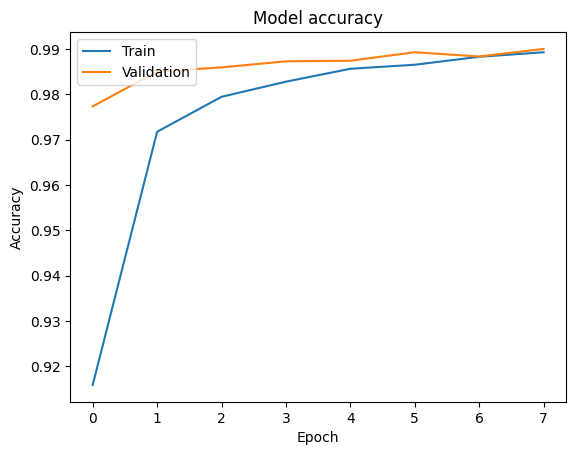

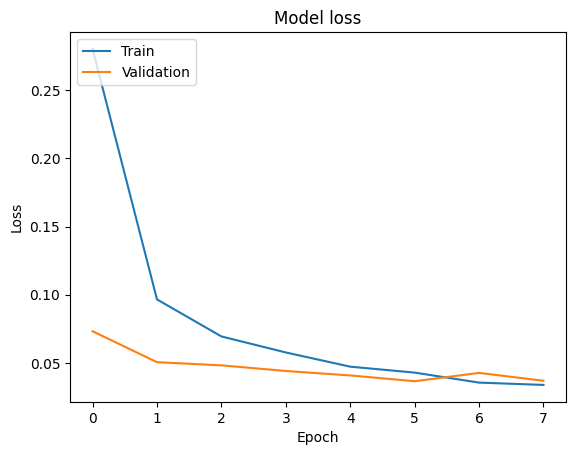

Number of misclassified images: 89 out of 10000 , accuracy 0.991100013256073


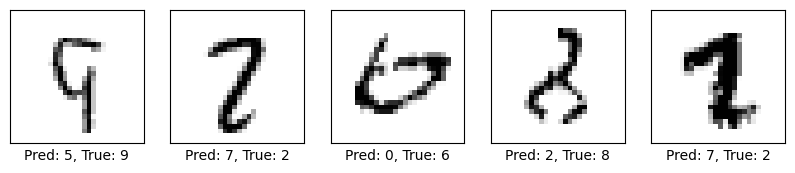

In [ ]:
# plot the training progress:
import matplotlib.pyplot as plt

history_dict = history.history
print(history_dict.keys())

# Plot training & validation accuracy values
plt.plot(history_dict['accuracy'])
plt.plot(history_dict['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_dict['loss'])
plt.plot(history_dict['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Misclassified indices:
misclassified_indices = np.where(y_pred != y_test)[0]
num_misclassified = len(misclassified_indices)
print("Number of misclassified images:", num_misclassified,
      "out of", len(y_test), ", accuracy", test_acc)

# Plot some misclassified images
num_images_to_plot = 5
plt.figure(figsize=(10, 10))
for i in range(min(num_images_to_plot, len(misclassified_indices))):
    index = misclassified_indices[i]
    plt.subplot(1, num_images_to_plot, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[index], cmap=plt.cm.binary)
    plt.xlabel(f"Pred: {y_pred[index]}, True: {y_test[index]}")
plt.show()